In [1]:
import tensorflow_datasets as tfds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Dataset Collection

### Here, Downloading the shoes data from the url and storing in a dataframe.

In [170]:
df, info = tfds.load('amazon_us_reviews/Shoes_v1_00', split='train[-20000:]', with_info=True)
# df, info = tfds.load('amazon_us_reviews/Shoes_v1_00', split='train[:1000]', with_info=True,num_parallel_reads=16)

# subset_dataset = tfds.Subset(df, range(1000))  # Extract first 1000 examples

In [171]:
dfr = tfds.as_dataframe(df)

In [235]:

dfr.head(5)


,data/customer_id,data/helpful_votes,data/marketplace,data/product_category,data/product_id,data/product_parent,data/product_title,data/review_body,data/review_date,data/review_headline,data/review_id,data/star_rating,data/total_votes,data/verified_purchase,data/vine
0,b'3341504',0,b'US',b'Shoes',b'B00JAWAI6A',b'761838730',"b""Giorgio Brutini Men's 24876 Slip On Loafer""",b'My size 44 and asked for this product and yo...,b'2015-04-27',b'My size 44 and asked for this product and yo...,b'R2NE0S3W0I8R7K',1,2,0,1
1,b'7691763',2,b'US',b'Shoes',b'B007XHBN2W',b'922964218',b'Danshuz Womens Girls Purple Front Zipper Dan...,b'Light weight and adorable for my dance shoes...,b'2014-02-19',b'Adorable',b'R391UT33CBXKFF',5,2,0,1
2,b'1726917',4,b'US',b'Shoes',b'B00I9TN8LW',b'996316693',"b""RYKA Women's Fanatic Plus Running Shoe""","b""I have worn Nike's for as long as I can reme...",b'2015-02-07',"b""I had been shopping for a pair and could not...",b'R3BYN7HBR7CTA9',5,4,0,1
3,b'29482983',0,b'US',b'Shoes',b'B00HZOKDII',b'790286692',"b""UGG Women's Cozy Flannel Slipper""",b'Great fit warm and cozy slippers',b'2014-12-23',b'Five Stars',b'RHV1NO3Z3JYD9',5,1,0,1
4,b'12715156',0,b'US',b'Shoes',b'B003OYJ9LK',b'489344064',"b""ASICS Women's GEL-Resort 2 Walking Shoe""",b'I have really bad feet so I am glad when I c...,b'2013-04-28',b'Fit is good',b'R2K09Q5TORL56F',4,0,0,1


### Dataset Description

customer_id: unique identifier for each customer

helpful_votes: number of helpful votes for the review

marketplace: the Amazon marketplace where the review was written (US)

product_category: category of the product (Shoes)

product_id: product unique identifier

product_parent: parent product identifier (used to group together variations of the same product)

product_title: title of the product

review_body: body part of the review

review_date: date the review was written

review_headline: headline of the review

review_id: review unique identifier

star_rating: rating given by the customer (1-5 stars)

total_votes: total number of votes for the review (i.e helpful and unhelpful)

verified_purchase: whether or not the product is purchased from Amazon and the review is verified

vine: whether or not the review was in Vine program (where customers receive free products in exchange for reviews)

### Storing the extracted last 20000 rows from the shoes dataset in the CSV file.

In [174]:
dfr.to_csv("shoes_practice.csv",index=False)

### Loading data from the csv file

In [251]:
df = pd.read_csv("shoes_practice.csv")

## 1.1 Querying the data / Dataset Preview

In [252]:
df.head(5)

,data/customer_id,data/helpful_votes,data/marketplace,data/product_category,data/product_id,data/product_parent,data/product_title,data/review_body,data/review_date,data/review_headline,data/review_id,data/star_rating,data/total_votes,data/verified_purchase,data/vine
0,b'3341504',0,b'US',b'Shoes',b'B00JAWAI6A',b'761838730',"b""Giorgio Brutini Men's 24876 Slip On Loafer""",b'My size 44 and asked for this product and yo...,b'2015-04-27',b'My size 44 and asked for this product and yo...,b'R2NE0S3W0I8R7K',1,2,0,1
1,b'7691763',2,b'US',b'Shoes',b'B007XHBN2W',b'922964218',b'Danshuz Womens Girls Purple Front Zipper Dan...,b'Light weight and adorable for my dance shoes...,b'2014-02-19',b'Adorable',b'R391UT33CBXKFF',5,2,0,1
2,b'1726917',4,b'US',b'Shoes',b'B00I9TN8LW',b'996316693',"b""RYKA Women's Fanatic Plus Running Shoe""","b""I have worn Nike's for as long as I can reme...",b'2015-02-07',"b""I had been shopping for a pair and could not...",b'R3BYN7HBR7CTA9',5,4,0,1
3,b'29482983',0,b'US',b'Shoes',b'B00HZOKDII',b'790286692',"b""UGG Women's Cozy Flannel Slipper""",b'Great fit warm and cozy slippers',b'2014-12-23',b'Five Stars',b'RHV1NO3Z3JYD9',5,1,0,1
4,b'12715156',0,b'US',b'Shoes',b'B003OYJ9LK',b'489344064',"b""ASICS Women's GEL-Resort 2 Walking Shoe""",b'I have really bad feet so I am glad when I c...,b'2013-04-28',b'Fit is good',b'R2K09Q5TORL56F',4,0,0,1


In [177]:
df.tail(5)

,data/customer_id,data/helpful_votes,data/marketplace,data/product_category,data/product_id,data/product_parent,data/product_title,data/review_body,data/review_date,data/review_headline,data/review_id,data/star_rating,data/total_votes,data/verified_purchase,data/vine
19995,b'11063331',0,b'US',b'Shoes',b'B005PLM016',b'804246440',"b""Fila Women's Skele-Toes EZ Slide Shoe""",b'I love them a lot and recommend them to my f...,b'2012-11-06',b'MsPrissy',b'R2DNZYMLY5JT69',5,0,0,1
19996,b'80829',0,b'US',b'Shoes',b'B00FWW0ZSI',b'734310501',"b""Very Volatile Women's Rockaway Wedge Sandal""",b'Very stylish. I can dress them up or dress ...,b'2015-03-31',b'Very stylish. I can dress them up or dress ...',b'R3DDLSHSRV1R5U',4,0,0,1
19997,b'38953442',0,b'US',b'Shoes',b'B000I6ZXTE',b'357804452',"b""Charles David Women's Elsa Ankle Boot""","b""Given that I wear high heels on a daily basi...",b'2007-10-16',b'Gorgeous and comfortable!',b'R37DEZWATTM0CA',5,0,0,1
19998,b'22683249',0,b'US',b'Shoes',b'B000EP6OUQ',b'27136041',"b""Sperry Top-Sider Men's Billfish 3-Eye Boat S...",b'Given as a gift and were just what I expected!',b'2015-03-03',b'Five Stars',b'R6JYMC8402NEB',5,0,0,1
19999,b'42820972',0,b'US',b'Shoes',b'B000WGAW50',b'514002090',b'The Original MuckBoots Daily Garden Shoe',b'My husband absolutely loves these garden boo...,b'2013-10-13',b'Awesome',b'R3DXCHSBV6PV29',5,0,0,1


## 1.2 Descriptive Analysis / Summary statistics
Checking total number of rows and columns

In [257]:
df_rows, df_columns = df.shape
print(f"Dataset has {df_rows} rows and {df_columns} columns.")

Dataset has 20000 rows and 15 columns.


In [258]:
df.describe()

,data/helpful_votes,data/star_rating,data/total_votes,data/verified_purchase,data/vine
count,20000.000000,20000.00000,20000.000000,20000.00000,20000.0000
mean,0.835150,4.24990,1.039050,0.09805,0.9999
std,4.594315,1.15335,4.984643,0.29739,0.0100
min,0.000000,1.00000,0.000000,0.00000,0.0000
25%,0.000000,4.00000,0.000000,0.00000,1.0000
50%,0.000000,5.00000,0.000000,0.00000,1.0000
75%,1.000000,5.00000,1.000000,0.00000,1.0000
max,317.000000,5.00000,333.000000,1.00000,1.0000


## 1.3 Data Cleaning
 In this step, we are modifying the original column names to make them more readable and relevant to our analysis.

In [259]:
df.columns

Index(['data/customer_id', 'data/helpful_votes', 'data/marketplace', 'data/product_category', 'data/product_id', 'data/product_parent', 'data/product_title', 'data/review_body', 'data/review_date', 'data/review_headline', 'data/review_id', 'data/star_rating', 'data/total_votes', 'data/verified_purchase', 'data/vine'], dtype='object')

In [260]:
df = df.rename(columns={'data/customer_id' : 'customer_id',
                        'data/helpful_votes' : 'helpful_votes', 
                        'data/marketplace':'marketplace',
                        'data/product_category':'product_category', 
                        'data/product_id':'product_id', 
                        'data/product_parent':'product_parent',
                        'data/product_title':'product_title', 
                        'data/review_body':'review_body',
                        'data/review_date':'review_date',
                        'data/review_headline':'review_headline',
                        'data/review_id':'review_id',
                        'data/star_rating':'star_rating',
                        'data/total_votes':'total_votes',
                        'data/verified_purchase':'verified_purchase',
                        'data/vine':'vine'
                       })

In [261]:
df.head(2)

,customer_id,helpful_votes,marketplace,product_category,product_id,product_parent,product_title,review_body,review_date,review_headline,review_id,star_rating,total_votes,verified_purchase,vine
0,b'3341504',0,b'US',b'Shoes',b'B00JAWAI6A',b'761838730',"b""Giorgio Brutini Men's 24876 Slip On Loafer""",b'My size 44 and asked for this product and yo...,b'2015-04-27',b'My size 44 and asked for this product and yo...,b'R2NE0S3W0I8R7K',1,2,0,1
1,b'7691763',2,b'US',b'Shoes',b'B007XHBN2W',b'922964218',b'Danshuz Womens Girls Purple Front Zipper Dan...,b'Light weight and adorable for my dance shoes...,b'2014-02-19',b'Adorable',b'R391UT33CBXKFF',5,2,0,1


### Here, in the dataset we can clearly see that most of the columns has the row starting with the value 'b' prefix. The error related to 'b""' or 'b'' in the dataframe columns is caused by the fact that some of the values in the columns are byte strings. These byte strings need to be converted to regular strings.

### Querying the columns data before cleaning

In [262]:
df[['customer_id','product_title','review_body']]

,customer_id,product_title,review_body
0,b'3341504',"b""Giorgio Brutini Men's 24876 Slip On Loafer""",b'My size 44 and asked for this product and yo...
1,b'7691763',b'Danshuz Womens Girls Purple Front Zipper Dan...,b'Light weight and adorable for my dance shoes...
2,b'1726917',"b""RYKA Women's Fanatic Plus Running Shoe""","b""I have worn Nike's for as long as I can reme..."
3,b'29482983',"b""UGG Women's Cozy Flannel Slipper""",b'Great fit warm and cozy slippers'
4,b'12715156',"b""ASICS Women's GEL-Resort 2 Walking Shoe""",b'I have really bad feet so I am glad when I c...
...,...,...,...
19995,b'11063331',"b""Fila Women's Skele-Toes EZ Slide Shoe""",b'I love them a lot and recommend them to my f...
19996,b'80829',"b""Very Volatile Women's Rockaway Wedge Sandal""",b'Very stylish. I can dress them up or dress ...
19997,b'38953442',"b""Charles David Women's Elsa Ankle Boot""","b""Given that I wear high heels on a daily basi..."
19998,b'22683249',"b""Sperry Top-Sider Men's Billfish 3-Eye Boat S...",b'Given as a gift and were just what I expected!'


### Checking data types for each column

In [263]:
print(df.dtypes)

customer_id          object
helpful_votes         int64
marketplace          object
product_category     object
product_id           object
product_parent       object
product_title        object
review_body          object
review_date          object
review_headline      object
review_id            object
star_rating           int64
total_votes           int64
verified_purchase     int64
vine                  int64
dtype: object


### Applying the regular expression to clean each row for whole dataset except five columns 'helpful_votes', 'star_rating', 'total_votes', 'verified_purchase', and 'vine'

In [264]:
import re

# RE to match the 'b' prefix
pattern = re.compile(r"^b['\"](.*)['\"]$")

# column names that donot have 'b' prefix
int_columns = ['helpful_votes', 'star_rating', 'total_votes', 'verified_purchase', 'vine']

# Apply pattern to each element of the dataframe
for col in df.columns:
    if col not in int_columns:
        df[col] = df[col].apply(lambda x: pattern.match(x).group(1) if isinstance(x, str) and pattern.match(x) else x)


In [265]:
# df = df.applymap(lambda x: x.decode('utf-8').strip("b'") if isinstance(x, bytes) else str(x).strip("b''"))

In [266]:
df.head(5)

,customer_id,helpful_votes,marketplace,product_category,product_id,product_parent,product_title,review_body,review_date,review_headline,review_id,star_rating,total_votes,verified_purchase,vine
0,3341504,0,US,Shoes,B00JAWAI6A,761838730,Giorgio Brutini Men's 24876 Slip On Loafer,My size 44 and asked for this product and you ...,2015-04-27,My size 44 and asked for this product and you ...,R2NE0S3W0I8R7K,1,2,0,1
1,7691763,2,US,Shoes,B007XHBN2W,922964218,Danshuz Womens Girls Purple Front Zipper Dance...,Light weight and adorable for my dance shoes.....,2014-02-19,Adorable,R391UT33CBXKFF,5,2,0,1
2,1726917,4,US,Shoes,B00I9TN8LW,996316693,RYKA Women's Fanatic Plus Running Shoe,I have worn Nike's for as long as I can rememb...,2015-02-07,I had been shopping for a pair and could not f...,R3BYN7HBR7CTA9,5,4,0,1
3,29482983,0,US,Shoes,B00HZOKDII,790286692,UGG Women's Cozy Flannel Slipper,Great fit warm and cozy slippers,2014-12-23,Five Stars,RHV1NO3Z3JYD9,5,1,0,1
4,12715156,0,US,Shoes,B003OYJ9LK,489344064,ASICS Women's GEL-Resort 2 Walking Shoe,I have really bad feet so I am glad when I can...,2013-04-28,Fit is good,R2K09Q5TORL56F,4,0,0,1


In [267]:
df['product_title']

0               Giorgio Brutini Men's 24876 Slip On Loafer
1        Danshuz Womens Girls Purple Front Zipper Dance...
2                   RYKA Women's Fanatic Plus Running Shoe
3                         UGG Women's Cozy Flannel Slipper
4                  ASICS Women's GEL-Resort 2 Walking Shoe
                               ...                        
19995                Fila Women's Skele-Toes EZ Slide Shoe
19996          Very Volatile Women's Rockaway Wedge Sandal
19997                Charles David Women's Elsa Ankle Boot
19998      Sperry Top-Sider Men's Billfish 3-Eye Boat Shoe
19999             The Original MuckBoots Daily Garden Shoe
Name: product_title, Length: 20000, dtype: object

## 1.3 Check for missing Values

**Compute Ratio**

$$ R_{m} = \frac{Number \, of \, missing \, values}{ Total \, number \, of \, values} $$

<br>

In this step, a verification of NaN values must be done. According to the previous formula, if the $R_{m}$ is too high, it is better to delete the entire column. If $R_{m}$ is low, it is recommended to impute NaN values with the mean, median or mode.

In [268]:
df.isnull().sum()

customer_id          0
helpful_votes        0
marketplace          0
product_category     0
product_id           0
product_parent       0
product_title        0
review_body          0
review_date          0
review_headline      0
review_id            0
star_rating          0
total_votes          0
verified_purchase    0
vine                 0
dtype: int64

There are no null values in this dataset. Applying the compute ration formula to show a $R_{m} = 0$ for each numerical feature.

In [269]:
def compute_ratio(dataset, columns):

  Rms = {}
  for col in columns:
    Rm = dataset[col].isnull().sum() / dataset[col].count()
    Rms[col] = Rm

  Rms = pd.DataFrame(Rms.items(), columns=['Feature', 'Rm'])

  return Rms 

In [270]:
Rms = compute_ratio(df, df.columns)
Rms

,Feature,Rm
0,customer_id,0.0
1,helpful_votes,0.0
2,marketplace,0.0
3,product_category,0.0
4,product_id,0.0
5,product_parent,0.0
6,product_title,0.0
7,review_body,0.0
8,review_date,0.0
9,review_headline,0.0


# 2 Data Preprocessing

## 2.1 Check Duplicates

In [271]:
duplicate_df = df[df.duplicated(keep=False)]
print(duplicate_df)

Empty DataFrame
Columns: [customer_id, helpful_votes, marketplace, product_category, product_id, product_parent, product_title, review_body, review_date, review_headline, review_id, star_rating, total_votes, verified_purchase, vine]
Index: []


### While checking for the whole dataframe there are no duplicate values.

In [272]:
df_duplicates = df[df.duplicated(subset=['product_id'], keep=False)]
print(f"Total number of duplicated items is :{len(df_duplicates)}")
df_duplicates.head(5)

Total number of duplicated items is :1019


,customer_id,helpful_votes,marketplace,product_category,product_id,product_parent,product_title,review_body,review_date,review_headline,review_id,star_rating,total_votes,verified_purchase,vine
81,14988518,14,US,Shoes,B00H3QNDEE,149312772,Skechers Women's Reggae-Zig Swag Flip-Flop,I love these shoes-the sole is great for walki...,2014-04-09,My new favorite shoes!,R2C6I4U5MQG7EA,5,14,0,1
83,47755919,0,US,Shoes,B004DEPOI2,582094940,ASICS Little Kid/Big Kid Gel-Matflex GS 3 Wres...,Had to return this. Shoe was way too narrow an...,2013-03-28,"Shoe was too narrow, not enough padding",R143NPUAHYNGXV,1,0,0,1
94,47602539,0,US,Shoes,B002NU6MM0,620625631,Sperry Top-Sider Women's Angelfish Oat Slip-On...,Love my sperries,2015-04-09,Five Stars,R4IX0BNMHANU8,5,0,0,1
106,26312958,0,US,Shoes,B0041FI6OC,79816154,Kamik Women's Jennifer Rain Boot,These boots are stylish and very good looking ...,2012-12-09,Good product,R3ES5D2177OC0F,4,0,0,1
130,4979793,0,US,Shoes,B005BQBMO6,71299635,DC Men's Pure Action Sport Sneaker,good item,2015-05-12,Five Stars,R2UBOI4PT6SEHT,5,0,0,1


In [273]:
df[df['product_id'] == 'B00H3QNDEE']

,customer_id,helpful_votes,marketplace,product_category,product_id,product_parent,product_title,review_body,review_date,review_headline,review_id,star_rating,total_votes,verified_purchase,vine
81,14988518,14,US,Shoes,B00H3QNDEE,149312772,Skechers Women's Reggae-Zig Swag Flip-Flop,I love these shoes-the sole is great for walki...,2014-04-09,My new favorite shoes!,R2C6I4U5MQG7EA,5,14,0,1
5963,36653573,0,US,Shoes,B00H3QNDEE,149312772,Skechers Women's Reggae-Zig Swag Flip-Flop,I love these sandals. I bought another pair! ...,2015-02-13,Love them!,R2ATKSY67CW6ZK,5,0,0,1


### although it seems like the data is duplicated having the same product id but actually it is the review for the same product from different customers. So we do not need to remove these columns.

In [274]:
df[df['total_votes']>150]

,customer_id,helpful_votes,marketplace,product_category,product_id,product_parent,product_title,review_body,review_date,review_headline,review_id,star_rating,total_votes,verified_purchase,vine
14275,26341811,177,US,Shoes,B00MK5425W,794738828,Skechers Women's Reggae-Rasta Thong Sandal,I love these sandals! Let me start by saying ...,2015-06-14,Great choice for Plantar fasciitis sufferers,RXZI6QK52X00J,5,178,0,1
14712,47439977,317,US,Shoes,B001OQUKV8,21905829,Ray Ban RB 2140 Original Wayfarer 901 Black/Cr...,"Without a doubt, the 2140 Original Wayfarers a...",2009-03-27,"The Coolest Sunglasses, But Be Sure to Order t...",RD0I0IV80YWGC,5,333,0,1
19294,12684301,164,US,Shoes,B0097O0FZ0,915657171,FitFlop Women's Lulu Thong Sandal,FitFlop seems to offer 2 different footpads wh...,2013-06-09,Disappointed,R1VABBDP4IWAAU,2,168,0,1


In [275]:
df[df['verified_purchase']==1].head(5)

,customer_id,helpful_votes,marketplace,product_category,product_id,product_parent,product_title,review_body,review_date,review_headline,review_id,star_rating,total_votes,verified_purchase,vine
21,904155,0,US,Shoes,B00QQ93KPG,113155012,Elegent Women's Plush HandBag Faux Fur Clutch ...,Was a little bit of a wait but well worth the ...,2015-04-20,Adorable crossbody bag,RH8DMSBBL65UL,5,0,1,1
30,6612747,1,US,Shoes,B0083DMUYA,663068936,New Balance Women's WT610 Trail Running Shoe,I gave this shoe a 5 star because it was exact...,2013-03-20,Great shoe,R16RFN90XBXBYS,5,2,1,1
35,31932745,2,US,Shoes,B008F0LORK,911090892,KEEN Nashoba CNX Athletic Sandal (Toddler/Litt...,Keen is a great sturdy shoe but for some reaso...,2013-08-21,Good Shoe,R3GFZ346ROXHPL,4,2,1,1
49,31714180,36,US,Shoes,B001CEBNGS,602363633,AmeriBag Zena Shoulder Bag,I bought this bag (in black) from ebags in Mar...,2010-08-08,Great kindle carrier,R1MOSBWPE831ND,5,37,1,1
66,42808640,8,US,Shoes,B00008CF4W,590078338,Women's Summer Athletic Slides,"My feet are just a little bit wide, size 6 1/2...",2003-04-14,Comfy and coral,R31FTXQC0IMMCU,4,8,1,1


# Exploratory Data Analyis

Text(0.5, 1.0, 'Number of reviews by star')

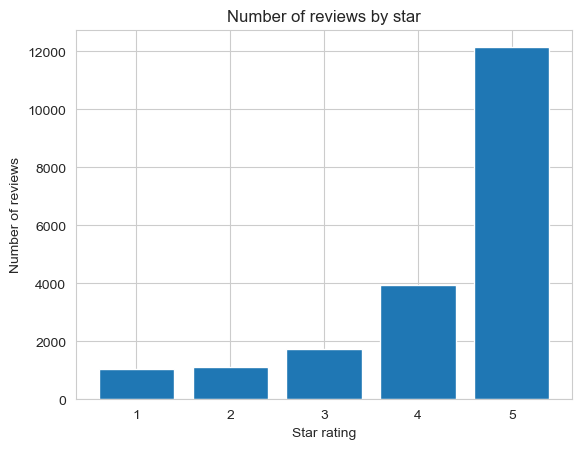

In [276]:
star_counts = df['star_rating'].value_counts()
plt.bar(star_counts.index, star_counts.values)
plt.xlabel('Star rating')
plt.ylabel('Number of reviews')
plt.title('Number of reviews by star')

### Scatterplot of Helpful Votes vs Total Votes

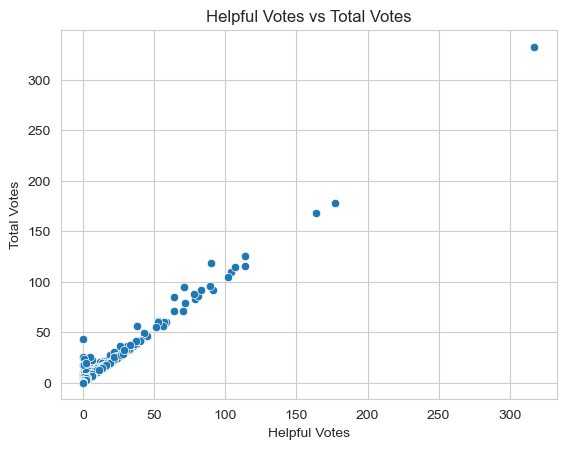

In [278]:
sns.scatterplot(x='helpful_votes', y='total_votes', data=df)
plt.title('Helpful Votes vs Total Votes')
plt.xlabel('Helpful Votes')
plt.ylabel('Total Votes')
plt.show()

### Box plot of helpful_votes column

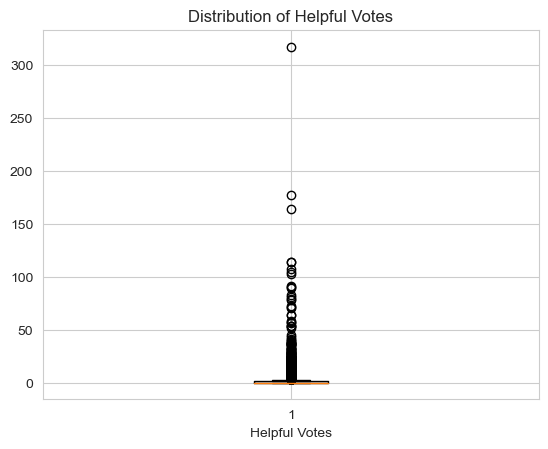

In [282]:
plt.boxplot(df["helpful_votes"])
plt.xlabel("Helpful Votes")
plt.title("Distribution of Helpful Votes")
plt.show()

# 3. Feature Selection

### checking each columns whether these features are required or not

In [198]:
df.columns

Index(['customer_id', 'helpful_votes', 'marketplace', 'product_category',
       'product_id', 'product_parent', 'product_title', 'review_body',
       'review_date', 'review_headline', 'review_id', 'star_rating',
       'total_votes', 'verified_purchase', 'vine'],
      dtype='object')

In [199]:
df['marketplace'].unique()

array(['US'], dtype=object)

### since this dataset only consists the data from US, so we don't need this column.

In [200]:
df['helpful_votes'].unique()

array([  0,   2,   4,   1,   3,  36,   8,  14,  16,   5,   9,   7,  45,
         6,  17,  11,  19,  12,  10,  18,  32,  15,  23,  37,  38,  13,
        21,  79,  30,  91,  71,  43,  22,  20,  81,  28,  35,  64,  33,
        58,  53,  25,  29, 114,  24,  72,  31,  27,  57,  26, 104,  34,
        83, 102,  39,  89,  56, 177, 317,  90,  41,  70,  40,  51, 164,
        78, 107], dtype=int64)

In [201]:
df['product_category'].unique()

array(['Shoes'], dtype=object)

### This dataset product category is shoes for all columns so we don't need this column as well.

In [202]:
df[['review_body','review_headline']].head(5)

,review_body,review_headline
0,My size 44 and asked for this product and you ...,My size 44 and asked for this product and you ...
1,Light weight and adorable for my dance shoes.....,Adorable
2,I have worn Nike's for as long as I can rememb...,I had been shopping for a pair and could not f...
3,Great fit warm and cozy slippers,Five Stars
4,I have really bad feet so I am glad when I can...,Fit is good


### The columns review_headline consists of the heading about what is inside the body column. So we can only consider review_column for further analysis.
### Similarly, removing all the unnecessary columns that are not relevant for our analysis.

In [203]:
df = df[['customer_id','helpful_votes', 'product_id', 'product_title', 'review_body', 'review_date', 'star_rating','total_votes','verified_purchase']]
df

,customer_id,helpful_votes,product_id,product_title,review_body,review_date,star_rating,total_votes,verified_purchase
0,3341504,0,B00JAWAI6A,Giorgio Brutini Men's 24876 Slip On Loafer,My size 44 and asked for this product and you ...,2015-04-27,1,2,0
1,7691763,2,B007XHBN2W,Danshuz Womens Girls Purple Front Zipper Dance...,Light weight and adorable for my dance shoes.....,2014-02-19,5,2,0
2,1726917,4,B00I9TN8LW,RYKA Women's Fanatic Plus Running Shoe,I have worn Nike's for as long as I can rememb...,2015-02-07,5,4,0
3,29482983,0,B00HZOKDII,UGG Women's Cozy Flannel Slipper,Great fit warm and cozy slippers,2014-12-23,5,1,0
4,12715156,0,B003OYJ9LK,ASICS Women's GEL-Resort 2 Walking Shoe,I have really bad feet so I am glad when I can...,2013-04-28,4,0,0
...,...,...,...,...,...,...,...,...,...
19995,11063331,0,B005PLM016,Fila Women's Skele-Toes EZ Slide Shoe,I love them a lot and recommend them to my fri...,2012-11-06,5,0,0
19996,80829,0,B00FWW0ZSI,Very Volatile Women's Rockaway Wedge Sandal,Very stylish. I can dress them up or dress th...,2015-03-31,4,0,0
19997,38953442,0,B000I6ZXTE,Charles David Women's Elsa Ankle Boot,"Given that I wear high heels on a daily basis,...",2007-10-16,5,0,0
19998,22683249,0,B000EP6OUQ,Sperry Top-Sider Men's Billfish 3-Eye Boat Shoe,Given as a gift and were just what I expected!,2015-03-03,5,0,0


### After performing data cleaning and preprocessing, 6 columns are removed from the dataframe.

In [204]:
df[df['verified_purchase']==1]

,customer_id,helpful_votes,product_id,product_title,review_body,review_date,star_rating,total_votes,verified_purchase
21,904155,0,B00QQ93KPG,Elegent Women's Plush HandBag Faux Fur Clutch ...,Was a little bit of a wait but well worth the ...,2015-04-20,5,0,1
30,6612747,1,B0083DMUYA,New Balance Women's WT610 Trail Running Shoe,I gave this shoe a 5 star because it was exact...,2013-03-20,5,2,1
35,31932745,2,B008F0LORK,KEEN Nashoba CNX Athletic Sandal (Toddler/Litt...,Keen is a great sturdy shoe but for some reaso...,2013-08-21,4,2,1
49,31714180,36,B001CEBNGS,AmeriBag Zena Shoulder Bag,I bought this bag (in black) from ebags in Mar...,2010-08-08,5,37,1
66,42808640,8,B00008CF4W,Women's Summer Athletic Slides,"My feet are just a little bit wide, size 6 1/2...",2003-04-14,4,8,1
...,...,...,...,...,...,...,...,...,...
19958,11364124,0,B00849DKZG,Teva Men's Jetter Sandal,I purchased a pair of these 2 years ago from a...,2014-08-25,5,0,1
19959,21197493,3,B008TSNOHG,Dunham Men's Windward Slip-On,"Great men's shoe, but was purposely shopping f...",2013-12-22,3,3,1
19962,22753983,0,B00BLS29PO,Sanrio Kids Girls' Hello Kitty Character Print...,"It's a little large, it shouldn't even say 11-...",2014-06-24,3,0,1
19963,29595308,1,B00D8GXXZ2,New Balance Women's WR00 Minimus Running Shoe,I am in need of a new running shoe and thought...,2014-07-01,3,2,1


In [205]:
df[df["product_id"]=="B00H3QNDEE"].count()[0] > 1

True

In [206]:
def f(record):
    if record.count()[0] > 1:
        return record

df.groupby("product_id").apply(f)

customer_id  helpful_votes  product_id  \
product_id                                                
B000074ER5 5817     36009897              5  B000074ER5   
           6742     49504079              5  B000074ER5   
B0000DCS5Y 3113     51820201              0  B0000DCS5Y   
           6714     14069276              0  B0000DCS5Y   
B0002I134C 8001     49300623              6  B0002I134C   
...                      ...            ...         ...   
B00OBCNL40 4614      5139116              0  B00OBCNL40   
B00R7NUT1S 2262     49691117              2  B00R7NUT1S   
           12961      877035              1  B00R7NUT1S   
B00VJJ2P7C 11613    11022920              0  B00VJJ2P7C   
           16767     5482193             40  B00VJJ2P7C   

                                                    product_title  \
product_id                                                          
B000074ER5 5817                    Nike Men's Zoom Flight Turbine   
           6742                    Nike Men's Zoom Flight Turbine   
B0000DCS5Y 3113   Sperry Top-Sider Men's Billfish 3-Eye Boat Shoe   
           6714   Sperry Top-Sider Men's Billfish 3-Eye Boat Shoe   
B0002I134C 8001                        Ariat Women's Fatbaby Boot   
...                                                           ...   
B00OBCNL40 4614         Madden Girl Women's Stackful Wedge Sandal   
B00R7NUT1S 2262              Fossil Preston Foldover Pouch Clutch   
           12961             Fossil Preston Foldover Pouch Clutch   
B00VJJ2P7C 11613         Anne Klein Shimmer Down Dome Satchel Bag   
           16767         Anne Klein Shimmer Down Dome Satchel Bag   

                                                        review_body  \
product_id                                                            
B000074ER5 5817   this shoe is one of the best shoes i have ever...   
           6742   This shoe is almost perfect. It is so light on...   
B0000DCS5Y 3113           only had 2 days but seem to be very comfy   
           6714   After one season, the insides fall apart. Not ...   
B0002I134C 8001   Very stylish and well-built. Super-comfy from ...   
...                                                             ...   
B00OBCNL40 4614                                               goods   
B00R7NUT1S 2262   This is a great clutch.I got in in the orange ...   
           12961                                               good   
B00VJJ2P7C 11613  Leather too hard but not a bad looking purse. ...   
           16767  I purchased this bag at Ross today and this is...   

                 review_date  star_rating  total_votes  verified_purchase  
product_id                                                                 
B000074ER5 5817   2003-03-31            5            5                  1  
           6742   2003-03-11            5            5                  1  
B0000DCS5Y 3113   2015-01-27            4            0                  0  
           6714   2015-05-28            3            0                  0  
B0002I134C 8001   2005-10-03            5            7                  0  
...                      ...          ...          ...                ...  
B00OBCNL40 4614   2015-08-02            5            0                  0  
B00R7NUT1S 2262   2015-04-28            5            2                  0  
           12961  2015-07-09            5            1                  0  
B00VJJ2P7C 11613  2015-07-11            2            0                  0  
           16767  2015-06-06            5           41                  1  

[1019 rows x 9 columns]

In [207]:
df.columns

Index(['customer_id', 'helpful_votes', 'product_id', 'product_title',
       'review_body', 'review_date', 'star_rating', 'total_votes',
       'verified_purchase'],
      dtype='object')

In [208]:
# dfr[dfr['product_parent']=="b'445329524'"]

# 4. Text Preprocessing

In [209]:
df_text = df[['review_body']].copy()
df_text

,review_body
0,My size 44 and asked for this product and you ...
1,Light weight and adorable for my dance shoes.....
2,I have worn Nike's for as long as I can rememb...
3,Great fit warm and cozy slippers
4,I have really bad feet so I am glad when I can...
...,...
19995,I love them a lot and recommend them to my fri...
19996,Very stylish. I can dress them up or dress th...
19997,"Given that I wear high heels on a daily basis,..."
19998,Given as a gift and were just what I expected!


In [210]:
type(df_text)

pandas.core.frame.DataFrame

## Importing additional libraries

In [211]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

## 4.1 convert string to lowercase

In [212]:
df_text['review_body'] = df_text['review_body'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
df_text['review_body'] = df_text['review_body'].str.lower()

## 4.2 Tokenization

In [213]:
def words_tokenize(sentence):
    tokens = word_tokenize(sentence)
    return tokens

df_text['tokens'] = df_text['review_body'].apply(lambda x: words_tokenize(x))

In [214]:
df_text

,review_body,tokens
0,my size 44 and asked for this product and you ...,"[my, size, 44, and, asked, for, this, product,..."
1,light weight and adorable for my dance shoes a...,"[light, weight, and, adorable, for, my, dance,..."
2,i have worn nikes for as long as i can remembe...,"[i, have, worn, nikes, for, as, long, as, i, c..."
3,great fit warm and cozy slippers,"[great, fit, warm, and, cozy, slippers]"
4,i have really bad feet so i am glad when i can...,"[i, have, really, bad, feet, so, i, am, glad, ..."
...,...,...
19995,i love them a lot and recommend them to my fri...,"[i, love, them, a, lot, and, recommend, them, ..."
19996,very stylish i can dress them up or dress the...,"[very, stylish, i, can, dress, them, up, or, d..."
19997,given that i wear high heels on a daily basis ...,"[given, that, i, wear, high, heels, on, a, dai..."
19998,given as a gift and were just what i expected,"[given, as, a, gift, and, were, just, what, i,..."


## 4.3 Stopwords removal

In [215]:
def remove_stopwords(tokens):
    stopwords = nltk.corpus.stopwords.words('english')
    filtered = [token for token in tokens if token not in stopwords]
    return filtered

df_text['stopwords_removed'] = df_text['tokens'].apply(lambda x: remove_stopwords(x))
df_text.head(5)

,review_body,tokens,stopwords_removed
0,my size 44 and asked for this product and you ...,"[my, size, 44, and, asked, for, this, product,...","[size, 44, asked, product, choose, size, 44br,..."
1,light weight and adorable for my dance shoes a...,"[light, weight, and, adorable, for, my, dance,...","[light, weight, adorable, dance, shoes, zumba,..."
2,i have worn nikes for as long as i can remembe...,"[i, have, worn, nikes, for, as, long, as, i, c...","[worn, nikes, long, remember, shopping, pair, ..."
3,great fit warm and cozy slippers,"[great, fit, warm, and, cozy, slippers]","[great, fit, warm, cozy, slippers]"
4,i have really bad feet so i am glad when i can...,"[i, have, really, bad, feet, so, i, am, glad, ...","[really, bad, feet, glad, shoe, day, think, sh..."


## 4.4 POS tagging and Lemmatization

In [216]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download required resources for WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Define lemmatization function
def lemmatize_words(text):
    lemmatizer = WordNetLemmatizer()
    pos_tags = nltk.pos_tag(text)
    return [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in pos_tags]

# Define function to get WordNet POS tag from treebank tag
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return nltk.corpus.wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return nltk.corpus.wordnet.VERB
    elif treebank_tag.startswith('N'):
        return nltk.corpus.wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return nltk.corpus.wordnet.ADV
    else:
        return nltk.corpus.wordnet.NOUN  # default to noun

# Apply lemmatization to stopwords_removed column
df_text['filtered_tokens'] = df_text['stopwords_removed'].apply(lemmatize_words)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Hari\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hari\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Here after stopwords removal we applied POS tagging and lemmatization to the words, and defined a function to map treebank POS tags to their corresponding WordNet POS tags. The resulting lemmatized words are stored in a dataframe column.

In [236]:
df_text

,review_body,tokens,stopwords_removed,filtered_tokens
0,my size 44 and asked for this product and you ...,"[my, size, 44, and, asked, for, this, product,...","[size, 44, asked, product, choose, size, 44br,...","[size, 44, ask, product, choose, size, 44br, r..."
1,light weight and adorable for my dance shoes a...,"[light, weight, and, adorable, for, my, dance,...","[light, weight, adorable, dance, shoes, zumba,...","[light, weight, adorable, dance, shoe, zumba, ..."
2,i have worn nikes for as long as i can remembe...,"[i, have, worn, nikes, for, as, long, as, i, c...","[worn, nikes, long, remember, shopping, pair, ...","[worn, nike, long, remember, shopping, pair, c..."
3,great fit warm and cozy slippers,"[great, fit, warm, and, cozy, slippers]","[great, fit, warm, cozy, slippers]","[great, fit, warm, cozy, slipper]"
4,i have really bad feet so i am glad when i can...,"[i, have, really, bad, feet, so, i, am, glad, ...","[really, bad, feet, glad, shoe, day, think, sh...","[really, bad, foot, glad, shoe, day, think, sh..."
...,...,...,...,...
19995,i love them a lot and recommend them to my fri...,"[i, love, them, a, lot, and, recommend, them, ...","[love, lot, recommend, friends, amazon, custom...","[love, lot, recommend, friend, amazon, custome..."
19996,very stylish i can dress them up or dress the...,"[very, stylish, i, can, dress, them, up, or, d...","[stylish, dress, dress]","[stylish, dress, dress]"
19997,given that i wear high heels on a daily basis ...,"[given, that, i, wear, high, heels, on, a, dai...","[given, wear, high, heels, daily, basis, cant,...","[give, wear, high, heel, daily, basis, cant, c..."
19998,given as a gift and were just what i expected,"[given, as, a, gift, and, were, just, what, i,...","[given, gift, expected]","[give, gift, expect]"


# 5. Vectorization

#### After the data preprocessing and text preprocessing steps, the next step is to apply the word vectorization methods to convert the text data into numerical format that can be used as input to the machine learning model. The two word vectorization methods that will be compared in this analysis are CountVectorizer and TF-IDF Vectorizer

## 5.1 Count Vectorizer

### Importing additional libraries

In [218]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [219]:
count_vectorizer = CountVectorizer()
count_vectorized = count_vectorizer.fit_transform(df_text['filtered_tokens'].apply(lambda x: ' '.join(x)))

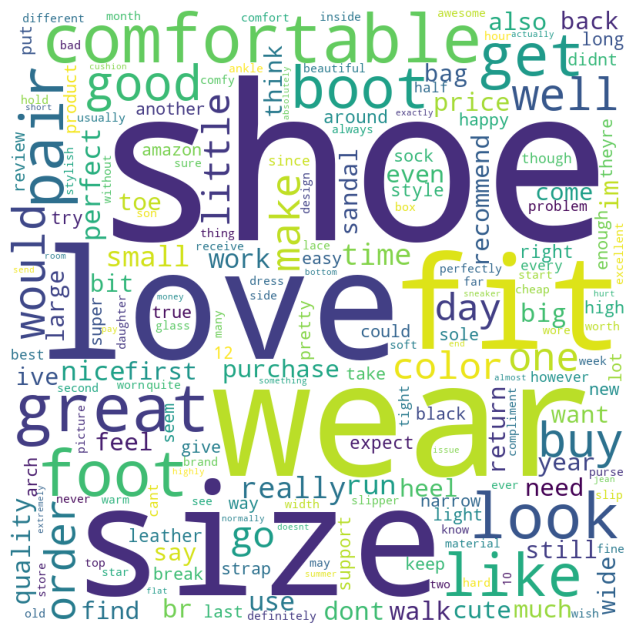

In [220]:
count_word_freq = dict(zip(count_vectorizer.get_feature_names_out(), np.asarray(count_vectorized.sum(axis=0)).ravel()))
count_wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(count_word_freq)
plt.figure(figsize=(8,8))
plt.imshow(count_wordcloud)
plt.axis('off')
plt.show()

## 5.2 TD-IDF Vectorizer

In [221]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorized = tfidf_vectorizer.fit_transform(df_text['filtered_tokens'].apply(lambda x: ' '.join(x)))

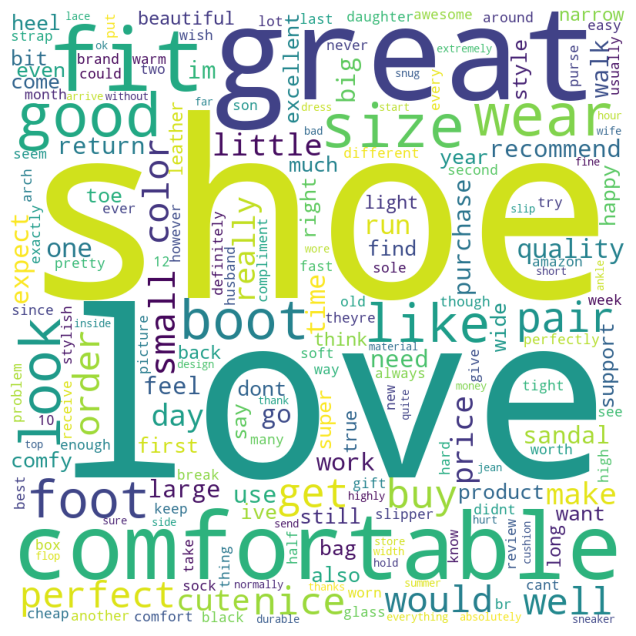

In [222]:
tfidf_word_freq = dict(zip(tfidf_vectorizer.get_feature_names_out(), np.asarray(tfidf_vectorized.sum(axis=0)).ravel()))
tfidf_wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(tfidf_word_freq)
plt.figure(figsize=(8,8))
plt.imshow(tfidf_wordcloud)
plt.axis('off')
plt.show()


## comparison

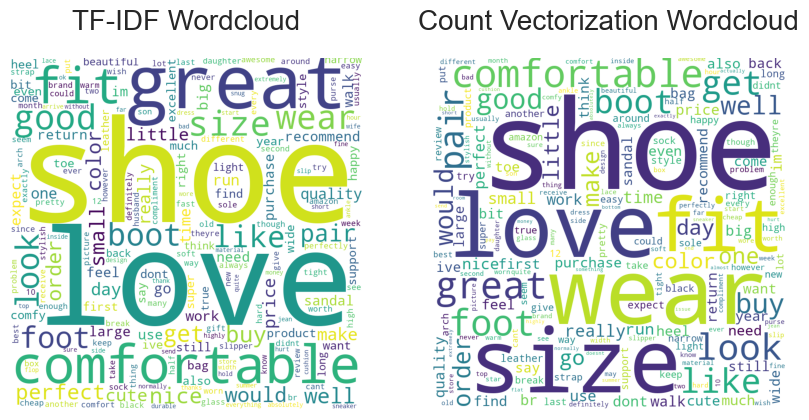

In [223]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(tfidf_wordcloud)
axs[0].set_title('TF-IDF Wordcloud',pad=20, fontsize=20)
axs[0].axis('off')
axs[1].imshow(count_wordcloud)
axs[1].set_title('Count Vectorization Wordcloud',pad=20, fontsize=20)
axs[1].axis('off')
# plt.tight_layout()
plt.show()


## 6 Model Building

In [224]:
df_model = pd.concat([df_text['filtered_tokens'],df['star_rating']], axis=1)

In [225]:
df_model

,filtered_tokens,star_rating
0,"[size, 44, ask, product, choose, size, 44br, r...",1
1,"[light, weight, adorable, dance, shoe, zumba, ...",5
2,"[worn, nike, long, remember, shopping, pair, c...",5
3,"[great, fit, warm, cozy, slipper]",5
4,"[really, bad, foot, glad, shoe, day, think, sh...",4
...,...,...
19995,"[love, lot, recommend, friend, amazon, custome...",5
19996,"[stylish, dress, dress]",4
19997,"[give, wear, high, heel, daily, basis, cant, c...",5
19998,"[give, gift, expect]",5


# Building Pipeline and model training

In [285]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the pipeline for logistic regression
lr_tfidf_pipeline = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('lr', LogisticRegression())
])

lr_count_pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('lr', LogisticRegression())
])

# Define the pipeline for xgboost
xgb_tfidf_pipeline = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('xgb', XGBClassifier())
])

xgb_count_pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer()),
    ('xgb', XGBClassifier())
])

# Split the data into training and testing sets
X = df_model['filtered_tokens'].apply(lambda x: ' '.join(x))
y = df_model['star_rating'] - 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and evaluate the logistic regression models with tfidf and count vectorizer
lr_tfidf_pipeline.fit(X_train, y_train)
lr_count_pipeline.fit(X_train, y_train)

lr_tfidf_train_acc = accuracy_score(y_train, lr_tfidf_pipeline.predict(X_train))
lr_tfidf_test_acc = accuracy_score(y_test, lr_tfidf_pipeline.predict(X_test))

lr_count_train_acc = accuracy_score(y_train, lr_count_pipeline.predict(X_train))
lr_count_test_acc = accuracy_score(y_test, lr_count_pipeline.predict(X_test))

# Fit and evaluate the xgboost models with tfidf and count vectorizer
xgb_tfidf_pipeline.fit(X_train, y_train)
xgb_count_pipeline.fit(X_train, y_train)

xgb_tfidf_train_acc = accuracy_score(y_train, xgb_tfidf_pipeline.predict(X_train))
xgb_tfidf_test_acc = accuracy_score(y_test, xgb_tfidf_pipeline.predict(X_test))

xgb_count_train_acc = accuracy_score(y_train, xgb_count_pipeline.predict(X_train))
xgb_count_test_acc = accuracy_score(y_test, xgb_count_pipeline.predict(X_test))

C:\Users\Hari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [286]:
# Print the accuracy scores
print("Logistic Regression with TF-IDF vectorizer - Train Accuracy:", lr_tfidf_train_acc)
print("Logistic Regression with TF-IDF vectorizer - Test Accuracy:", lr_tfidf_test_acc)
print("Logistic Regression with Count vectorizer - Train Accuracy:", lr_count_train_acc)
print("Logistic Regression with Count vectorizer - Test Accuracy:", lr_count_test_acc)
print("XGBoost with TF-IDF vectorizer - Train Accuracy:", xgb_tfidf_train_acc)
print("XGBoost with TF-IDF vectorizer - Test Accuracy:", xgb_tfidf_test_acc)
print("XGBoost with Count vectorizer - Train Accuracy:", xgb_count_train_acc)
print("XGBoost with Count vectorizer - Test Accuracy:", xgb_count_test_acc)


Logistic Regression with TF-IDF vectorizer - Train Accuracy: 0.7505625
Logistic Regression with TF-IDF vectorizer - Test Accuracy: 0.65925
Logistic Regression with Count vectorizer - Train Accuracy: 0.860375
Logistic Regression with Count vectorizer - Test Accuracy: 0.6545
XGBoost with TF-IDF vectorizer - Train Accuracy: 0.839875
XGBoost with TF-IDF vectorizer - Test Accuracy: 0.64825
XGBoost with Count vectorizer - Train Accuracy: 0.803125
XGBoost with Count vectorizer - Test Accuracy: 0.64825


# Visualizing and comparing the result

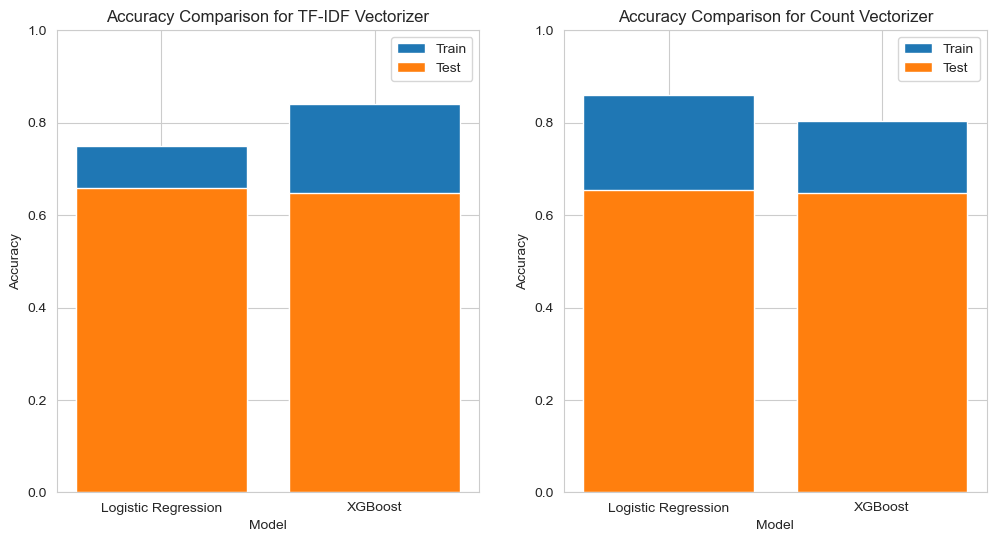

In [287]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

#TF-IDF Vectorizer
ax[0].bar(['Logistic Regression', 'XGBoost'], [lr_tfidf_train_acc, xgb_tfidf_train_acc], label='Train')
ax[0].bar(['Logistic Regression', 'XGBoost'], [lr_tfidf_test_acc, xgb_tfidf_test_acc], label='Test')
ax[0].set_ylim([0, 1])
ax[0].set_title('Accuracy Comparison for TF-IDF Vectorizer')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

# count vectorizer
ax[1].bar(['Logistic Regression', 'XGBoost'], [lr_count_train_acc, xgb_count_train_acc], label='Train')
ax[1].bar(['Logistic Regression', 'XGBoost'], [lr_count_test_acc, xgb_count_test_acc], label='Test')
ax[1].set_ylim([0, 1])
ax[1].set_title('Accuracy Comparison for Count Vectorizer')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

## Plotting and comparing the word clouds

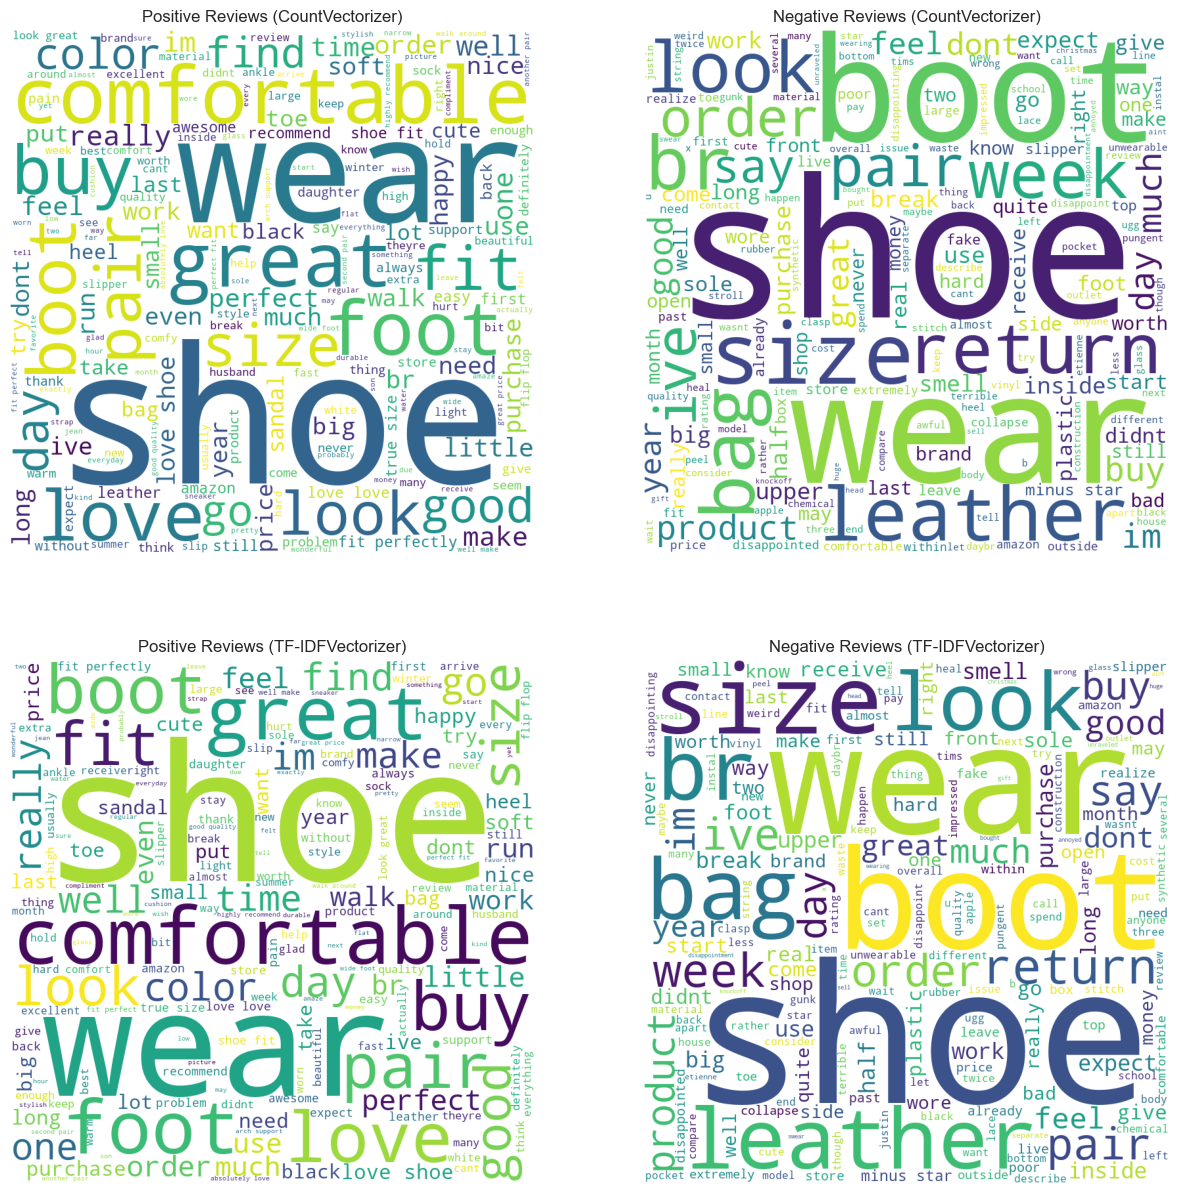

In [288]:
# Plot the word clouds
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0, 0].imshow(WordCloud(width=800, height=800, background_color='white').generate(positive_words_cv))
axs[0, 0].set_title("Positive Reviews (CountVectorizer)")
axs[0, 0].axis('off')

axs[0, 1].imshow(WordCloud(width=800, height=800, background_color='white').generate(negative_words_cv))
axs[0, 1].set_title("Negative Reviews (CountVectorizer)")
axs[0, 1].axis('off')

axs[1, 0].imshow(WordCloud(width=800, height=800, background_color='white').generate(positive_words_tfidf))
axs[1, 0].set_title("Positive Reviews (TF-IDFVectorizer)")
axs[1, 0].axis('off')

axs[1, 1].imshow(WordCloud(width=800, height=800, background_color='white').generate(negative_words_tfidf))
axs[1, 1].set_title("Negative Reviews (TF-IDFVectorizer)")
axs[1, 1].axis('off')
plt.show()

# Conclusion

Two vectorization methods, Count Vectorizer and TF-IDF Vectorizer, were used to preprocess and analyze the US Shoes Review Dataset of Amazon. I also built two machine-learning models using vectorization algorithms and compared their results. Moreover, we visualized the most frequent words in the review using the word clouds generated by these vectorization methods.